In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# http://docs.continuum.io/anaconda/pkg-docs
# conda install basemap
# Proceed ([y]/n)?

from mpl_toolkits.basemap import Basemap

In [20]:
def plot_global_map(output, lats=[], lons=[]):
    m = Basemap(projection='cyl', resolution='l')
    plt.figure(figsize=(10,5))
    m.bluemarble()
    x, y = m(lons, lats)
    m.scatter(x, y, s=1, color='#ff0000', marker='o', alpha=0.3)
    plt.savefig(output,dpi=300)
        

In [21]:
def plot_korea_map(output, lats=[], lons=[]):
    m = Basemap(llcrnrlon=124.,llcrnrlat=32.,urcrnrlon=132.,urcrnrlat=44.,\
                resolution='l',projection='cyl')
    plt.figure(figsize=(8,10))
    x, y = m(lons, lats)
    m.drawcoastlines()
    m.drawrivers()
    m.drawcountries()
    m.drawparallels(np.arange(32,44,2),labels=[1,1,0,1])
    m.drawmeridians(np.arange(124,132,2), labels=[1,1,0,1])
    m.scatter(x, y, s=1, color='#ff0000', marker='o', alpha=0.3)
    
    plt.savefig(output,dpi=300)

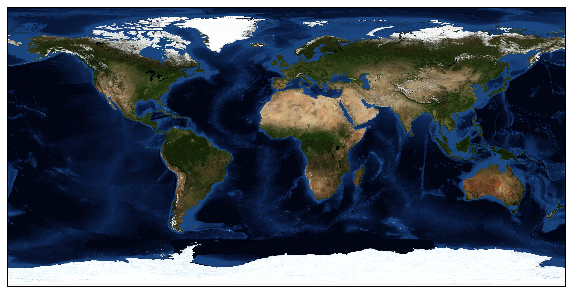

In [22]:
plot_global_map('globalmap.png', [37.323],[-122.0322] )

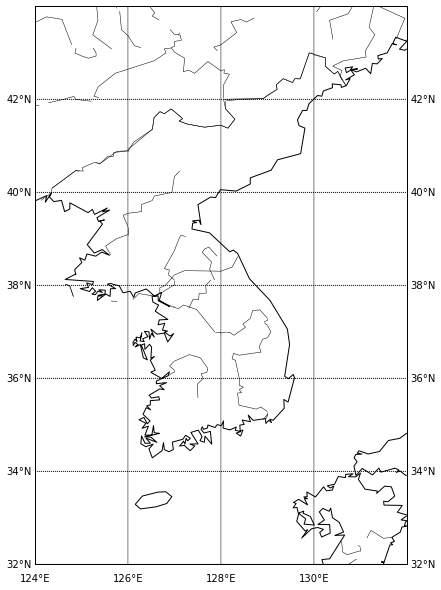

In [23]:
plot_korea_map('koreamap.png', [37.541],[126.986] )

In [24]:
# http://pythonhosted.org/python-geoip/
# pip install python-geoip
# pip install python-geoip-geolite2

from geoip import geolite2

In [25]:
match = geolite2.lookup('17.0.0.1')
match

<IPInfo ip='17.0.0.1' country='US' continent='NA' subdivisions=frozenset(['CA']) timezone='America/Los_Angeles' location=(37.323, -122.0322)>

In [26]:
match.location

(37.323, -122.0322)

In [27]:
geolite2.lookup('172.26.116.71') # private ip 172.16-31.*, 192.168.*, 10.*

In [28]:
df = pd.read_csv("imapuserip.txt", sep='/', names=['ip','app'])

In [29]:
df

,ip,app
0,1.218.185.3,NaN
1,1.225.39.227,NaN
2,1.226.147.144,NaN
3,1.226.20.235,NaN
4,1.226.23.70,NaN
5,1.226.26.122,NaN
6,1.226.5.161,NaN
7,1.227.78.224,NaN
8,1.228.12.13,NaN
9,1.231.144.104,NaN


In [30]:
lat=[]
lon=[]

for ip in df['ip']:
    match = geolite2.lookup(ip)
    if match != None:
        lat.append(match.location[0])
        lon.append(match.location[1])
    else:
        lat.append(None)
        lon.append(None)
    
df['latitude'] = lat
df['longitude'] = lon

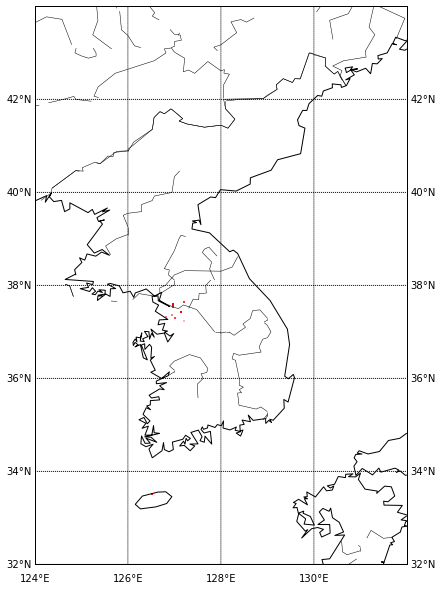

In [31]:
plot_korea_map('koreamap.png', df['latitude'].dropna(), df['longitude'].dropna() )

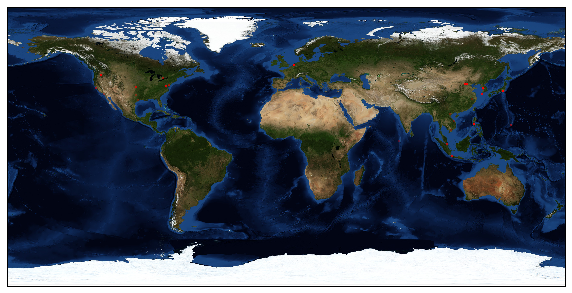

In [32]:
plot_global_map('globalmap.png', df['latitude'].dropna(), df['longitude'].dropna() )